In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2024-03-19 09:51:05.457726: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 09:51:05.490157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 09:51:05.490185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 09:51:05.491287: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 09:51:05.496858: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 09:51:05.497900: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
train_data_info = pd.read_csv("/workspaces/AITemplate/BrainTechAcademy/data_train/data_train_tutorial_four_classes.csv",
                            names=['data', 'label'])
test_data_info = pd.read_csv("/workspaces/AITemplate/BrainTechAcademy/data_test/data_test_tutorial_four_classes.csv",
                            names=['data', 'label'])

In [5]:
# Drop the data in test_data_info from train_data_info
for i in (test_data_info['data']):
    train_data_info = train_data_info[train_data_info['data'] != i]

train_data_info.reset_index(drop=True, inplace=True)

In [4]:
"""for i in range(len(train_data_info)):
    print(train_data_info.data[i])"""

'for i in range(len(train_data_info)):\n    print(train_data_info.data[i])'

In [6]:
split = 60
length = int(600/split)
span = 200

In [7]:
X_train = np.empty((0, 0, span, 3))
X_train.shape

(0, 0, 200, 3)

In [8]:
train_data[0][0][1]

NameError: name 'train_data' is not defined

In [9]:
X_train = np.empty((0, span, 3))
y_train = np.empty(0)
for i in range(len(train_data_info)):
# Formatting the training data into one big numpy array
    train = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/data_train/{}'.format(train_data_info.data[i]), 
                        names=['r', 'g', 'b'])  

    """#apply sigmoid function to normalize the data
    train["r"] = 1/(1+tf.exp(-train["r"]))
    train["g"] = 1/(1+tf.exp(-train["g"]))
    train["b"] = 1/(1+tf.exp(-train["b"]))
    train.describe()"""
    
    # Convert the data into an image and append the data to the numpy array
    train_data = train.values.reshape(1, 600, 3)
    for t in range(split-span//length):
        X_train = np.append(X_train, train_data[0][length*(t):span+length*(t)].reshape(1, span, 3), axis=0)
    # Formatting the training lables into one big numpy array
        y_train = np.append(y_train, int(train_data_info['label'][i]))


y_train = y_train.astype(int)
#X_train = X_train.reshape(X_train.shape[0], span, 3, 1)

""" # Display the image
    plt.imshow(image)
    #plt.imshow(image, cmap='gray', interpolation='none')
    #change the size of the figure
    plt.axis('off')
    plt.show()"""
    

" # Display the image\n    plt.imshow(image)\n    #plt.imshow(image, cmap='gray', interpolation='none')\n    #change the size of the figure\n    plt.axis('off')\n    plt.show()"

In [10]:
X_train.shape

(2880, 200, 3)

In [11]:
X_test = np.empty((0, span, 3))
y_test = np.empty(0)
for i in range(len(test_data_info)-1):
# Formatting the training data into one big numpy array
    test = pd.read_csv('/workspaces/AITemplate/BrainTechAcademy/data_test/{}'.format(test_data_info.data[i+1]), 
                        names=['r', 'g', 'b'])  

    """#apply sigmoid function to normalize the data
    test["r"] = 1/(1+tf.exp(-test["r"]))
    test["g"] = 1/(1+tf.exp(-test["g"]))
    test["b"] = 1/(1+tf.exp(-test["b"]))"""
    
    # Convert the data into an image and append the data to the numpy array
    test_data = test.values.reshape(1, 600, 3)
    for t in range(split-span//length):
        X_test = np.append(X_test, test_data[0][length*(t):span+length*(t)].reshape(1, span, 3), axis=0)
    # Formatting the training lables into one big numpy array
        y_test = np.append(y_test, int(test_data_info['label'][i+1]))

y_test = y_test.astype(int)
#X_test = X_test.reshape(X_test.shape[0], span, 3, 1)

In [12]:
y_test.shape

(960,)

In [13]:
# shuffle the data
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2880, 200, 3) (2880,) (960, 200, 3) (960,)


In [14]:
y_train

array([0, 2, 3, ..., 2, 3, 3])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_43 (Conv1D)          (None, 198, 32)           320       
                                                                 
 max_pooling1d_43 (MaxPooli  (None, 99, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_44 (Conv1D)          (None, 97, 32)            3104      
                                                                 
 max_pooling1d_44 (MaxPooli  (None, 48, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_45 (Conv1D)          (None, 46, 32)            3104      
                                                                 
 max_pooling1d_45 (MaxPooli  (None, 23, 32)           

768/768 [==============================] - 2s 2ms/step - loss: 0.8631 - accuracy: 0.6215 - val_loss: 0.8022 - val_accuracy: 0.6667
Epoch 2/10
768/768 [==============================] - 1s 2ms/step - loss: 0.5992 - accuracy: 0.7656 - val_loss: 0.7013 - val_accuracy: 0.7066
Epoch 3/10
768/768 [==============================] - 1s 2ms/step - loss: 0.4713 - accuracy: 0.8190 - val_loss: 0.5912 - val_accuracy: 0.7899
Epoch 4/10
768/768 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8411 - val_loss: 0.5350 - val_accuracy: 0.7917
Epoch 5/10
768/768 [==============================] - 1s 2ms/step - loss: 0.3080 - accuracy: 0.8876 - val_loss: 0.3838 - val_accuracy: 0.8715
Epoch 6/10
768/768 [==============================] - 2s 2ms/step - loss: 0.2190 - accuracy: 0.9227 - val_loss: 0.5526 - val_accuracy: 0.7969
Epoch 7/10
768/768 [==============================] - 1s 2ms/step - loss: 0.1516 - accuracy: 0.9501 - val_loss: 0.4381 - val_accuracy: 0.8802
Epoch 8/10
768/76

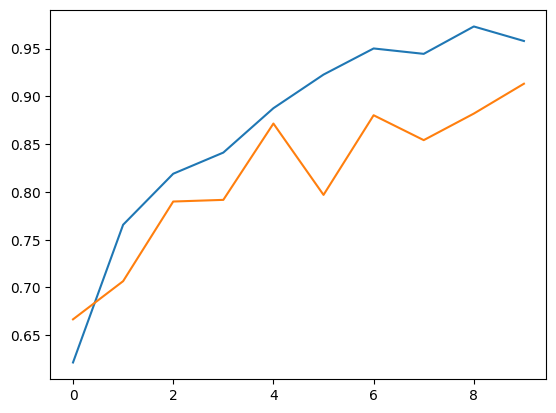

In [24]:
model = Sequential()
"""model.add(Flatten(input_shape=(span, 3)))
#model.add(Dense(32, input_dim=600*3, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))"""

model.add(Conv1D(32, 3, activation='relu', input_shape=(span, 3)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

number_of_epochs = 10
history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=3, validation_split=0.2, verbose=1, shuffle=True)

model.evaluate(X_test, y_test)
print("Accuracy: ", model.evaluate(X_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [16]:
X_train.shape

(2880, 200, 3)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

#What is n_estimators?
#n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the best number of trees for the specific use case.

#What is RandomForestClassifier?
#Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_reshaped, y_train)

y_pred = rf_classifier.predict(X_test_reshaped)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#What is RandomForestClassifier?
#Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Accuracy: 0.771875

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       240
           1       0.76      0.95      0.84       240
           2       0.65      0.68      0.66       240
           3       0.75      0.65      0.70       240

    accuracy                           0.77       960
   macro avg       0.78      0.77      0.77       960
weighted avg       0.78      0.77      0.77       960

